In [2]:
import pandas as pd

df = pd.read_pickle("../Data/out.pkl")

df.head()


,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM
871479,18,3000019,3000019,18_3000019,0.0,0.0,0.0,6
871482,18,3000023,3000023,18_3000023,0.0,0.0,0.0,7
871484,18,3000025,3000025,18_3000025,0.0,0.0,0.0,7
871492,18,3000040,3000040,18_3000040,4.0,0.0,0.0,10
871502,18,3000066,3000066,18_3000066,0.0,0.0,0.0,10


In [3]:
# Constants

CHROMOSOME_18_BP = 90720763

In [4]:
print(df['start'].min())

3000019


In [5]:
df["Majority"] = df["predict_state_SUM"] > 10
open_closed = df.groupby('Majority').count()
open_closed

,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM
Majority,,,,,,,,
False,2200537,2200537,2200537,2200537,2200537,2200537,2200537,2200537
True,1901611,1901611,1901611,1901611,1901611,1901611,1901611,1901611


In [6]:
df["Majority"] = df["Majority"].astype(int)
majority = df["Majority"]
df["diffs"] = majority.diff()

regions = df[df["diffs"] != 0]
regions = regions.reset_index(drop = True)

extremes_start = regions["start"]
lenghts = extremes_start.diff()
open_region_lengths = lenghts[2::2]
closed_region_lengths = lenghts[1::2]
open_region_lengths[:50]


2       455.0
4       271.0
6       103.0
8       283.0
10     1001.0
12      244.0
14       89.0
16      121.0
18      246.0
20      259.0
22     1216.0
24      176.0
26      109.0
28      578.0
30      316.0
32      241.0
34      201.0
36      191.0
38      321.0
40      184.0
42      178.0
44      243.0
46      166.0
48      198.0
50       90.0
52      216.0
54       82.0
56      134.0
58      414.0
60      305.0
62      173.0
64       89.0
66      500.0
68       91.0
70       94.0
72      130.0
74      103.0
76      152.0
78      428.0
80      203.0
82      113.0
84       80.0
86       68.0
88       94.0
90       49.0
92      140.0
94      130.0
96       79.0
98      151.0
100     215.0
Name: start, dtype: float64

In [7]:
regions["lenght"] = regions["start"].diff().shift(-1)
regions["open"] = regions["diffs"] == 1

open_regions = regions[regions["open"] == True]
closed_regions = regions[regions["open"] == False]

open_regions.head()


,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM,Majority,diffs,lenght,open
1,18,3002193,3002193,18_3002193,0.0,0.0,3.0,12,1,1.0,455.0,True
3,18,3003922,3003922,18_3003922,1.0,0.0,0.0,12,1,1.0,271.0,True
5,18,3004806,3004806,18_3004806,0.0,0.0,0.0,11,1,1.0,103.0,True
7,18,3005107,3005107,18_3005107,1.0,2.0,0.0,20,1,1.0,283.0,True
9,18,3005448,3005448,18_3005448,0.0,1.0,0.0,13,1,1.0,1001.0,True


In [8]:
print("PRIEŠ VALYMĄ")

short_open_regions = regions.loc[(regions['open'] == True) & (regions['lenght']  <= 75)]
short_closed_regions = regions.loc[(regions['open'] == False) & (regions['lenght']  <= 50)]

print(len(short_open_regions.index))
print(len(short_closed_regions.index))
print(len(regions.index))

PRIEŠ VALYMĄ
8887
3179
192151


In [9]:
regions = regions.drop(regions[(regions['open'] == True) & (regions['lenght']  <= 75)].index)
regions = regions.drop(regions[(regions['open'] == False) & (regions['lenght']  <= 50)].index)
regions = regions.drop(regions[(regions['open'] == regions['open'].shift(-1))].index)

regions["lenght"] = regions["start"].diff().shift(-1)



In [10]:
print("PO VALYMO")

short_open_regions = regions.loc[(regions['open'] == True) & (regions['lenght']  <= 75)]
short_closed_regions = regions.loc[(regions['open'] == False) & (regions['lenght']  <= 50)]

print(len(short_open_regions.index))
print(len(short_closed_regions.index))
print(len(regions.index))

PO VALYMO
0
0
168475


In [11]:
regions["end"] = regions["start"].shift(-1) - 1
regions["end"] = regions["end"].fillna(0).astype(int)

In [12]:
open_regions = regions[regions["open"] == True]
closed_regions = regions[regions["open"] == False]

print(open_region_lengths[:10])
open_regions.head()

2      455.0
4      271.0
6      103.0
8      283.0
10    1001.0
12     244.0
14      89.0
16     121.0
18     246.0
20     259.0
Name: start, dtype: float64


,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM,Majority,diffs,lenght,open
1,18,3002193,3002647,18_3002193,0.0,0.0,3.0,12,1,1.0,455.0,True
3,18,3003922,3004192,18_3003922,1.0,0.0,0.0,12,1,1.0,271.0,True
5,18,3004806,3004908,18_3004806,0.0,0.0,0.0,11,1,1.0,103.0,True
7,18,3005107,3005389,18_3005107,1.0,2.0,0.0,20,1,1.0,283.0,True
9,18,3005448,3006448,18_3005448,0.0,1.0,0.0,13,1,1.0,1001.0,True


Medianos
224.0
353.0

Moda
0    94.0
dtype: float64
0    81.0
dtype: float64

Vidurkiai
398.46055771216925
641.4736398494723

Sumos
33565122.0
54035815.0

Frakcija
0.3831593947448302
0.6168406052551698


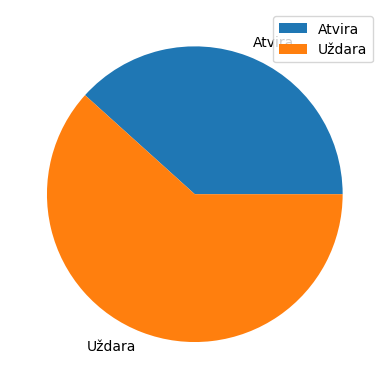

In [13]:
import matplotlib.pyplot as plt

open_regions_18 = open_regions[open_regions['seqnames'] == '18']
closed_regions_18 = closed_regions[closed_regions['seqnames'] == '18']

print("Medianos")
print(open_regions_18["lenght"].median())
print(closed_regions_18["lenght"].median())

print("\nModa")
print(open_regions_18["lenght"].mode())
print(closed_regions_18["lenght"].mode())

print("\nVidurkiai")
print(open_regions_18["lenght"].mean())
print(closed_regions_18["lenght"].mean())

print("\nSumos")
s1 = open_regions_18["lenght"].sum()
print(s1)
s2 = closed_regions_18["lenght"].sum()
print(s2)

print("\nFrakcija")
print(s1/(s1+s2))
print(s2/(s1+s2))
mylabels = ["Atvira", "Uždara"]

plt.pie([s1, s2], labels = mylabels)
plt.legend()
plt.show()

In [14]:
open_regions_18["lenght"].describe()

count    84237.000000
mean       398.460558
std        585.808719
min         76.000000
25%        125.000000
50%        224.000000
75%        447.000000
max      50072.000000
Name: lenght, dtype: float64

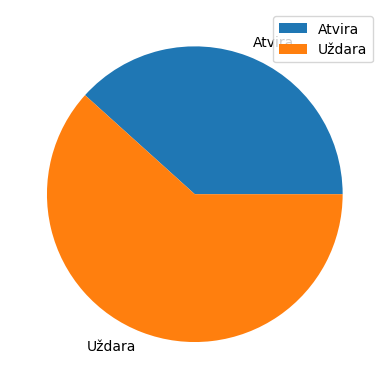

In [15]:
fig, ax = plt.pie([s1, s2], labels = mylabels)
#fig.set_title("PMM rezultatai")
plt.legend()
plt.show()

In [16]:
s1+s2

87600937.0

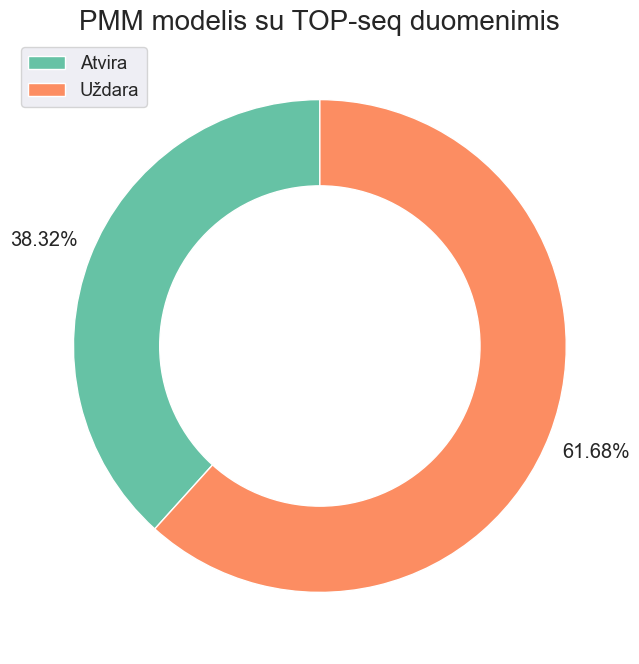

In [17]:
import seaborn as sns

def draw_circle_graph(open_value, closed_value, title):
    sns.set(font_scale = 1.2)
    plt.figure(figsize=(8,8))
    
    wedges, texts, autotexts = plt.pie(
        x=[open_value, closed_value], 
        colors=sns.color_palette('Set2'),
        startangle=90,
        autopct='%2.2f%%',
        pctdistance=1.2
    )
    
    plt.legend(wedges, mylabels, loc="upper left")
    hole = plt.Circle((0, 0), 0.65, facecolor='white')
    plt.gcf().gca().add_artist(hole)
    
    plt.title(title, fontsize = 20)

    plt.show()

draw_circle_graph(s1, s2, "PMM modelis su TOP-seq duomenimis")

In [18]:
import seaborn as sns

def draw_circle_graph_notitle(open_value, closed_value):
    sns.set(font_scale = 1.2)
    plt.figure(figsize=(8,8))
    
    wedges, texts, autotexts = plt.pie(
        x=[open_value, closed_value], 
        colors=sns.color_palette('Set2'),
        startangle=90,
        autopct='%2.2f%%',
        pctdistance=1.2
    )
    
    plt.legend(wedges, mylabels, loc="upper left")
    hole = plt.Circle((0, 0), 0.65, facecolor='white')
    plt.gcf().gca().add_artist(hole)
    

    plt.show()

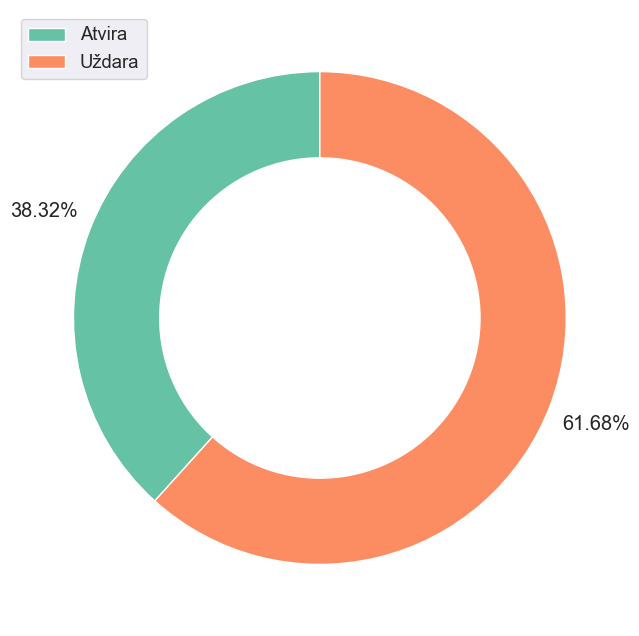

In [19]:
draw_circle_graph_notitle(s1, s2)

<BarContainer object of 2 artists>

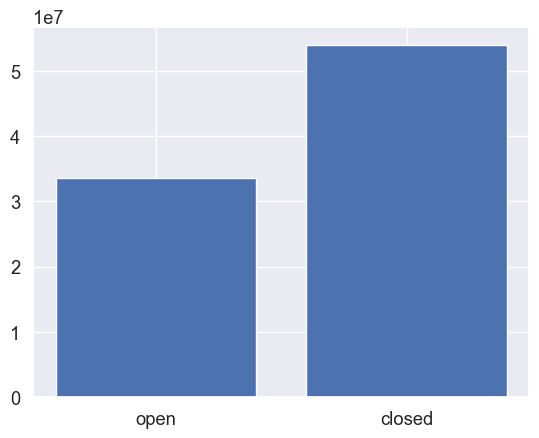

In [20]:
plt.bar(["open", "closed"], [s1, s2])

In [21]:
def draw_circle_graph_notitle(open_value, closed_value):
    sns.set(font_scale = 1.2)
    plt.figure(figsize=(8,8))
    
    wedges, texts, autotexts = plt.pie(
        x=[open_value, closed_value], 
        colors=sns.color_palette('Set2'),
        startangle=90,
        autopct='%2.2f%%',
        pctdistance=1.2
    )
    
    plt.legend(wedges, mylabels, loc="upper left")
    hole = plt.Circle((0, 0), 0.65, facecolor='white')
    plt.gcf().gca().add_artist(hole)

    plt.show()

In [22]:
df

,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM,Majority,diffs
871479,18,3000019,3000019,18_3000019,0.0,0.0,0.0,6,0,NaN
871482,18,3000023,3000023,18_3000023,0.0,0.0,0.0,7,0,0.0
871484,18,3000025,3000025,18_3000025,0.0,0.0,0.0,7,0,0.0
871492,18,3000040,3000040,18_3000040,4.0,0.0,0.0,10,0,0.0
871502,18,3000066,3000066,18_3000066,0.0,0.0,0.0,10,0,0.0
...,...,...,...,...,...,...,...,...,...,...
4061463,18,90601940,90601940,18_90601940,0.0,0.0,0.0,0,0,0.0
4061464,18,90601946,90601946,18_90601946,0.0,0.0,0.0,0,0,0.0
4061465,18,90601952,90601952,18_90601952,0.0,0.0,0.0,0,0,0.0
4061466,18,90601957,90601957,18_90601957,0.0,0.0,0.0,0,0,0.0


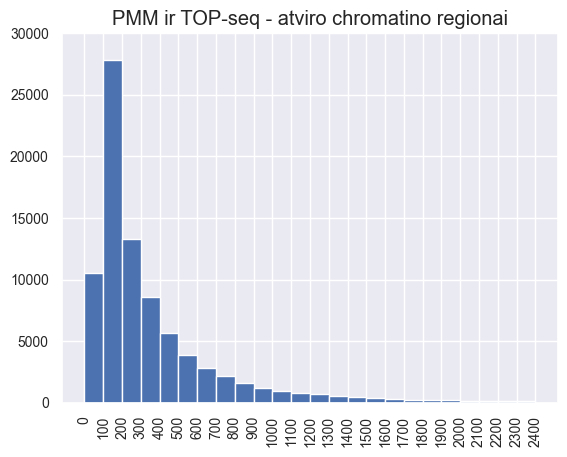

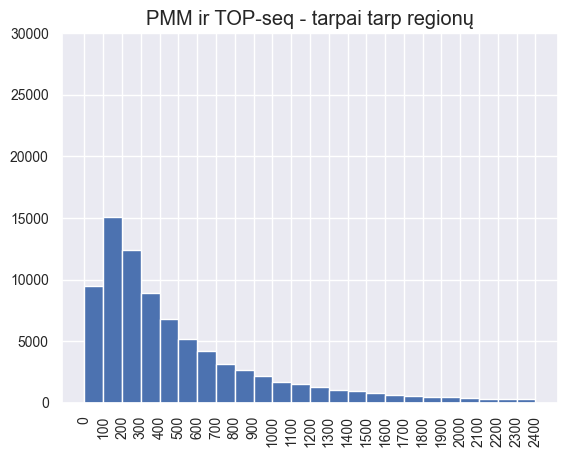

In [77]:
import matplotlib.pyplot as plt
import numpy as np

open_regions_18 = open_regions[open_regions['seqnames'] == '18']
closed_regions_18 = closed_regions[closed_regions['seqnames'] == '18']

bins = np.arange(0, 2500, step=100)

plt.hist(open_regions_18["lenght"], bins=bins, range=(-50, 2000))
plt.title("PMM ir TOP-seq - atviro chromatino regionai")
plt.xticks(bins, fontsize = 10, rotation='vertical')
plt.yticks(fontsize = 10)

axes = plt.gca()
axes.set_ylim([0,30000])
plt.show()

plt.hist(closed_regions["lenght"], bins=bins, range=(-50, 2000))
plt.title("PMM ir TOP-seq - tarpai tarp regionų")
plt.xticks(bins, fontsize = 10, rotation='vertical')
plt.yticks(fontsize = 10)
axes = plt.gca()
axes.set_ylim([0,30000])
plt.show()

In [24]:
import pyreadr

result = pyreadr.read_r('../Data/ATAC_dt.RDS')
atac = result[None]
print(atac.head())

  seqnames    start      end  width strand    study
0        1  3062536  3063132    597      *  ATACseq
1        1  3482735  3483063    329      *  ATACseq
2        1  3549538  3549654    117      *  ATACseq
3        1  3649136  3649335    200      *  ATACseq
4        1  3670656  3672554   1899      *  ATACseq


      seqnames    start      end  width strand    study
22118       18  3280837  3281100    264      *  ATACseq
22119       18  3336875  3337865    991      *  ATACseq
22120       18  3382982  3383314    333      *  ATACseq
22121       18  3449574  3449756    183      *  ATACseq
22122       18  3481298  3481423    126      *  ATACseq
Kiekis
1649
Medianos
242.0

Moda
0    107
dtype: int32

Vidurkiai
336.3899332929048

Sumos
554707


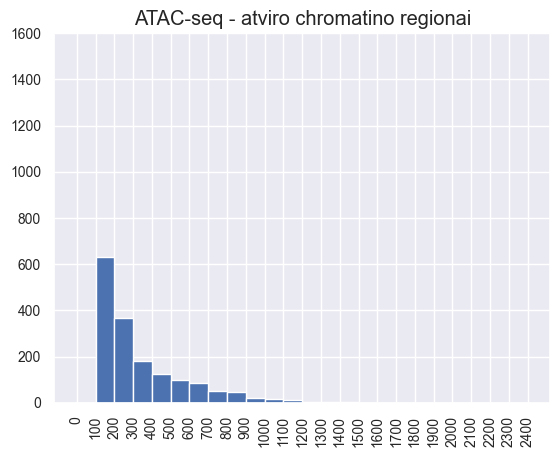

In [78]:
atac_18 = atac[atac['seqnames'] == '18']
print(atac_18.head())
atac_lengths = atac_18['width']

print("Kiekis")
print(atac_lengths.count())

print("Medianos")
print(atac_lengths.median())

print("\nModa")
print(atac_lengths.mode())

print("\nVidurkiai")
print(atac_lengths.mean())

print("\nSumos")
sum_atac = atac_lengths.sum()
print(sum_atac)

bins = np.arange(0, 2500, step=100)
fig, axes, a = plt.hist(atac_lengths, bins=bins, range=(-50, 1000))
plt.title("ATAC-seq - atviro chromatino regionai")
plt.xticks(bins, fontsize = 10, rotation='vertical')
plt.yticks(fontsize = 10)
plt.ylim([0,1600])
plt.show()

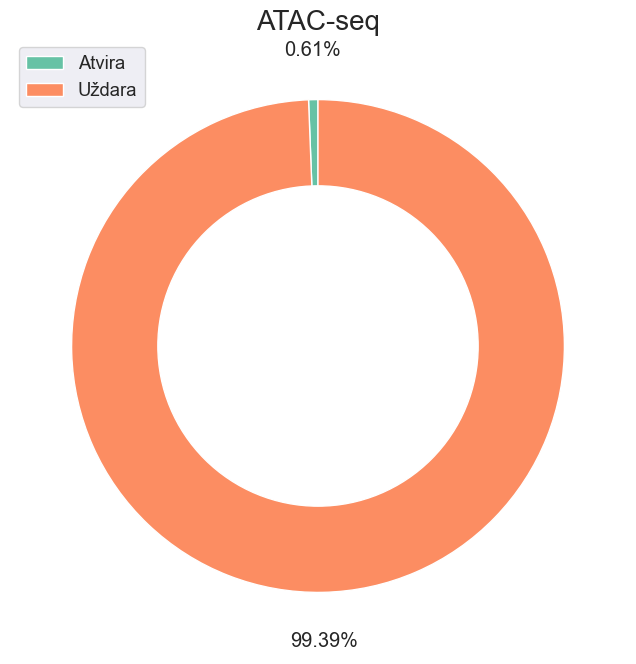

In [26]:
draw_circle_graph(sum_atac, CHROMOSOME_18_BP-sum_atac, "ATAC-seq")

In [27]:
atac_18['width'].describe()

count    1649.000000
mean      336.389933
std       246.344841
min       101.000000
25%       155.000000
50%       242.000000
75%       443.000000
max      1499.000000
Name: width, dtype: float64

In [28]:
import pyreadr

result = pyreadr.read_r('../Data/DNAseq_dt.RDS')
dnaseq = result[None]
print(dnaseq.head())

  seqnames    start      end  width strand   study
0        1  3062584  3062721    138      *  DNAseq
1        1  3062853  3063133    281      *  DNAseq
2        1  3343577  3343809    233      *  DNAseq
3        1  3445798  3445915    118      *  DNAseq
4        1  3445996  3446201    206      *  DNAseq


Kiekis
3232
Medianos
206.0

Moda
0    102
dtype: int32

Vidurkiai
277.40965346534654

Sumos
896588


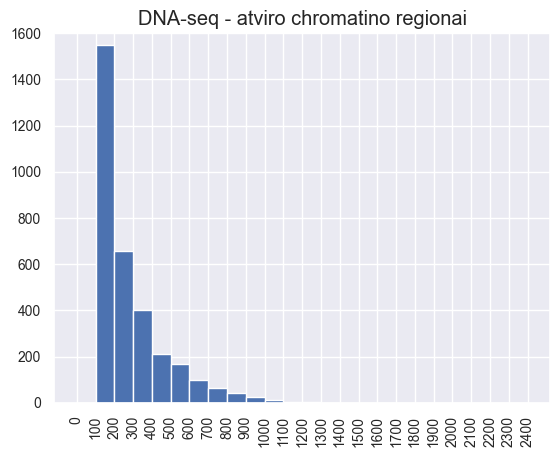

In [79]:
dnaseq_18 = dnaseq[dnaseq['seqnames'] == '18']
dnaseq_lengths = dnaseq_18['width']

print("Kiekis")
print(dnaseq_lengths.count())

print("Medianos")
print(dnaseq_lengths.median())

print("\nModa")
print(dnaseq_lengths.mode())

print("\nVidurkiai")
print(dnaseq_lengths.mean())

print("\nSumos")
dnaseq_sum = dnaseq_lengths.sum()
print(dnaseq_sum)

plt.hist(dnaseq_lengths, bins=bins, range=(-50, 1000))
plt.title("DNA-seq - atviro chromatino regionai")
plt.xticks(bins, fontsize = 10, rotation='vertical')
plt.yticks(fontsize = 10)
plt.ylim([0,1600])
plt.show()


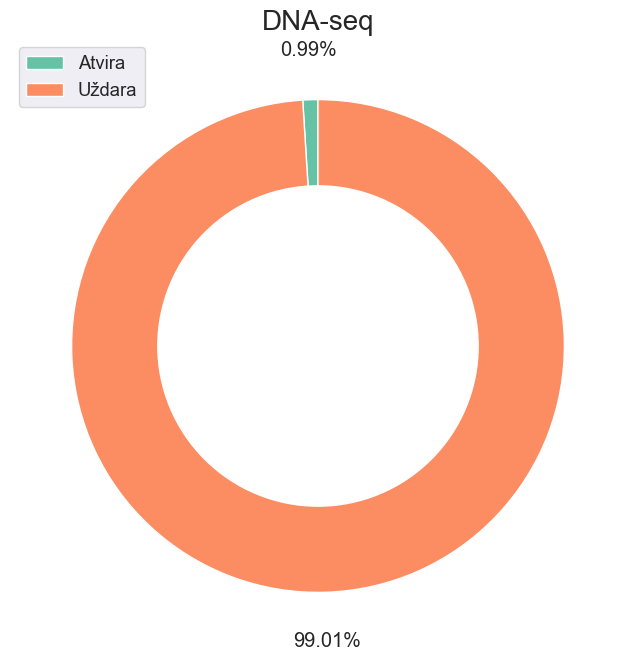

In [30]:
draw_circle_graph(dnaseq_sum, CHROMOSOME_18_BP-dnaseq_sum, "DNA-seq")

In [31]:
dnaseq_18['width'].describe()

count    3232.000000
mean      277.409653
std       189.478355
min       101.000000
25%       142.000000
50%       206.000000
75%       349.000000
max      1286.000000
Name: width, dtype: float64

In [32]:
def format_regions(open_regions):
    open_regions_formatted = open_regions.copy()
    open_regions_formatted.rename(columns={'lenght' : 'width', 'start' : 'Start', 'end' : 'End', 'seqnames' : 'Chromosome', 'predict_state_SUM' : 'Score', 'CG_ID' : "name"}, inplace=True)

    open_regions_formatted.drop(['Majority'], axis=1, inplace=True)
    open_regions_formatted.drop(['diffs'], axis=1, inplace=True)
    open_regions_formatted.drop(['open'], axis=1, inplace=True)

    open_regions_formatted['strand'] = '.'
    #open_regions_formatted['name'] = open_regions_formatted['Start']

    return open_regions_formatted

In [33]:
open_regions_formatted = format_regions(open_regions)

In [34]:
open_regions_formatted.head()

,Chromosome,Start,End,name,TT_S0,TT_S1,TT_S2,Score,width,strand
1,18,3002193,3002647,18_3002193,0.0,0.0,3.0,12,455.0,.
3,18,3003922,3004192,18_3003922,1.0,0.0,0.0,12,271.0,.
5,18,3004806,3004908,18_3004806,0.0,0.0,0.0,11,103.0,.
7,18,3005107,3005389,18_3005107,1.0,2.0,0.0,20,283.0,.
9,18,3005448,3006448,18_3005448,0.0,1.0,0.0,13,1001.0,.


In [35]:
dnaseq.head()

,seqnames,start,end,width,strand,study
0,1,3062584,3062721,138,*,DNAseq
1,1,3062853,3063133,281,*,DNAseq
2,1,3343577,3343809,233,*,DNAseq
3,1,3445798,3445915,118,*,DNAseq
4,1,3445996,3446201,206,*,DNAseq


In [36]:
dnaseq_formatted = dnaseq.copy()
dnaseq_formatted.rename(columns={'start' : 'Start', 'end' : 'End', 'seqnames' : 'Chromosome'}, inplace=True)


In [37]:
dnaseq_formatted.head()

,Chromosome,Start,End,width,strand,study
0,1,3062584,3062721,138,*,DNAseq
1,1,3062853,3063133,281,*,DNAseq
2,1,3343577,3343809,233,*,DNAseq
3,1,3445798,3445915,118,*,DNAseq
4,1,3445996,3446201,206,*,DNAseq


In [38]:
import pyranges as pr

open_ranges = pr.PyRanges(open_regions_formatted)
dnaseq_ranges = pr.PyRanges(dnaseq_formatted)

open_ranges_18 = open_ranges['18']
dnaseq_ranges_18 = dnaseq_ranges['18']

overlaps = open_ranges_18.overlap(dnaseq_ranges_18)
intersections = open_ranges_18.intersect(dnaseq_ranges_18)

print(overlaps)
print("ILGIS: ", overlaps.length)

print(intersections)
print("ILGIS: ", intersections.length)

print("Jaccard index: ",  intersections.length/overlaps.length)


+--------------+-----------+-----------+-------------+-------------+-------+
| Chromosome   | Start     | End       | name        | TT_S0       | +5    |
| (category)   | (int64)   | (int64)   | (object)    | (float64)   | ...   |
|--------------+-----------+-----------+-------------+-------------+-------|
| 18           | 3005107   | 3005389   | 18_3005107  | 1.0         | ...   |
| 18           | 3005448   | 3006448   | 18_3005448  | 0.0         | ...   |
| 18           | 3039391   | 3039804   | 18_3039391  | 0.0         | ...   |
| 18           | 3280712   | 3281526   | 18_3280712  | 0.0         | ...   |
| ...          | ...       | ...       | ...         | ...         | ...   |
| 18           | 90412149  | 90412618  | 18_90412149 | 0.0         | ...   |
| 18           | 90509761  | 90510810  | 18_90509761 | 0.0         | ...   |
| 18           | 90579385  | 90580098  | 18_90579385 | 0.0         | ...   |
| 18           | 90580173  | 90580942  | 18_90580173 | 1.0         | ...   |

In [39]:
open_ranges_18.head()

,Chromosome,Start,End,name,TT_S0,TT_S1,TT_S2,Score,width,strand
0,18,3002193,3002647,18_3002193,0.0,0.0,3.0,12,455.0,.
1,18,3003922,3004192,18_3003922,1.0,0.0,0.0,12,271.0,.
2,18,3004806,3004908,18_3004806,0.0,0.0,0.0,11,103.0,.
3,18,3005107,3005389,18_3005107,1.0,2.0,0.0,20,283.0,.
4,18,3005448,3006448,18_3005448,0.0,1.0,0.0,13,1001.0,.
5,18,3006632,3006875,18_3006632,0.0,0.0,0.0,11,244.0,.
6,18,3006980,3007068,18_3006980,0.0,0.0,1.0,16,89.0,.
7,18,3008020,3008140,18_3008020,0.0,0.0,0.0,12,121.0,.


In [40]:
open_short = open_ranges_18.drop(['TT_S0', 'TT_S1', 'TT_S2', 'width'])
print(open_short)

+--------------+-----------+-----------+-------------+-----------+------------+
| Chromosome   | Start     | End       | name        | Score     | strand     |
| (category)   | (int64)   | (int64)   | (object)    | (int64)   | (object)   |
|--------------+-----------+-----------+-------------+-----------+------------|
| 18           | 3002193   | 3002647   | 18_3002193  | 12        | .          |
| 18           | 3003922   | 3004192   | 18_3003922  | 12        | .          |
| 18           | 3004806   | 3004908   | 18_3004806  | 11        | .          |
| 18           | 3005107   | 3005389   | 18_3005107  | 20        | .          |
| ...          | ...       | ...       | ...         | ...       | ...        |
| 18           | 90598847  | 90598959  | 18_90598847 | 15        | .          |
| 18           | 90599512  | 90599601  | 18_90599512 | 18        | .          |
| 18           | 90599734  | 90599866  | 18_90599734 | 12        | .          |
| 18           | 90600877  | 90600955  |

In [41]:
open_short.to_bed("open_ranges_18.bed")
dnaseq_ranges_18.to_bed("dnaseq_ranges_18.bed")
dnaseq_ranges_18.head()

,Chromosome,Start,End,width,strand,study
0,18,3000012,3000342,331,*,DNAseq
1,18,3004544,3004668,125,*,DNAseq
2,18,3005165,3005411,247,*,DNAseq
3,18,3005785,3006003,219,*,DNAseq
4,18,3039453,3039587,135,*,DNAseq
5,18,3117979,3118328,350,*,DNAseq
6,18,3280730,3281254,525,*,DNAseq
7,18,3336941,3337189,249,*,DNAseq


In [42]:
dnaseq_df = dnaseq_ranges_18.df
dnaseq_df.rename(columns={'study' : 'name'}, inplace=True)
dnaseq_df['strand'] = '.'
dnaseq_df['score'] = '1'
dnaseq_df = dnaseq_df[['Chromosome', 'Start', 'End', 'name', 'score', 'strand']]
dnaseq_df.head()

dnaseq_df.to_csv("dnaseq.bed", sep='\t', index=False, header=False)

In [43]:
import pyranges as pr

def print_overlaps(open, dnaseq):
    open_ranges = pr.PyRanges(open)
    dnaseq_ranges = pr.PyRanges(dnaseq)

    open_ranges_18 = open_ranges['18']
    dnaseq_ranges_18 = dnaseq_ranges['18']

    overlaps = open_ranges_18.overlap(dnaseq_ranges_18)
    intersections = open_ranges_18.intersect(dnaseq_ranges_18)

    print(overlaps)
    print("ILGIS: ", overlaps.length)

    print(intersections)
    print("ILGIS: ", intersections.length)

    print("Jaccard index: ",  intersections.length/overlaps.length)

In [44]:
print(open_ranges_18.length)
print(dnaseq_ranges_18.length)

33480885
893356


In [45]:
#PRE
to_array_pre = open_regions["start"]
from_array_pre = to_array_pre - 100

bins_pre = pd.IntervalIndex.from_arrays(from_array_pre, to_array_pre, closed="left")
print(bins_pre)

#POST
from_array_post = open_regions["end"]
to_array_post = from_array_post + 100

bins_post = pd.IntervalIndex.from_arrays(from_array_post, to_array_post, closed="left")
print(bins_post)

#OPEN
from_array_open = open_regions["start"]
to_array_open = open_regions["end"]

bins_open = pd.IntervalIndex.from_arrays(from_array_open, to_array_open, closed="left")
print(bins_open)

IntervalIndex([[3002093, 3002193), [3003822, 3003922), [3004706, 3004806), [3005007, 3005107), [3005348, 3005448) ... [90597607, 90597707), [90598747, 90598847), [90599412, 90599512), [90599634, 90599734), [90600777, 90600877)],
              closed='left',
              dtype='interval[int64]')
IntervalIndex([[3002647, 3002747), [3004192, 3004292), [3004908, 3005008), [3005389, 3005489), [3006448, 3006548) ... [90597803, 90597903), [90598959, 90599059), [90599601, 90599701), [90599866, 90599966), [90600955, 90601055)],
              closed='left',
              dtype='interval[int64]')
IntervalIndex([[3002193, 3002647), [3003922, 3004192), [3004806, 3004908), [3005107, 3005389), [3005448, 3006448) ... [90597707, 90597803), [90598847, 90598959), [90599512, 90599601), [90599734, 90599866), [90600877, 90600955)],
              closed='left',
              dtype='interval[int64]')


In [46]:
import pyreadr

result = pyreadr.read_r('../Data/exampleForLukas.RDS')
df = result[None]
print(df.head())
print()



  seqnames     start       end        CG_ID  TT_S0  TT_S1  TT_S2
0       18  10000018  10000018  18_10000018    0.0    0.0    0.0
1       18  10000117  10000117  18_10000117    0.0    0.0    0.0
2       18  10000155  10000155  18_10000155    0.0    0.0    1.0
3       18  10000222  10000222  18_10000222    0.0    4.0    0.0
4       18  10000281  10000281  18_10000281    0.0    0.0    0.0



In [47]:
df["open_bin"] = pd.cut(df['start'], bins=bins_open)
df["pre_bin"] = pd.cut(df['start'], bins=bins_pre)
df["post_bin"] = pd.cut(df['start'], bins=bins_post)

df["count"] = df["end"] - df["start"] + 1

print(df.tail())

        seqnames    start      end       CG_ID  TT_S0  TT_S1  TT_S2 open_bin  \
7037511       19  9999950  9999950  19_9999950    0.0    0.0    0.0      NaN   
7037512       19  9999960  9999960  19_9999960    1.0    0.0    0.0      NaN   
7037513       19  9999966  9999966  19_9999966    0.0    1.0    1.0      NaN   
7037514       19  9999979  9999979  19_9999979    0.0    0.0    0.0      NaN   
7037515       19  9999987  9999987  19_9999987    1.0    0.0    0.0      NaN   

        pre_bin post_bin  count  
7037511     NaN      NaN      1  
7037512     NaN      NaN      1  
7037513     NaN      NaN      1  
7037514     NaN      NaN      1  
7037515     NaN      NaN      1  


In [48]:
print(df['seqnames'].unique())

['18', '19']
Categories (2, object): ['18', '19']


In [49]:
pd.set_option('display.expand_frame_repr', False)
pd.options.display.max_rows = 200
print(df[0:10])

  seqnames     start       end        CG_ID  TT_S0  TT_S1  TT_S2                  open_bin                   pre_bin post_bin  count
0       18  10000018  10000018  18_10000018    0.0    0.0    0.0                       NaN                       NaN      NaN      1
1       18  10000117  10000117  18_10000117    0.0    0.0    0.0                       NaN                       NaN      NaN      1
2       18  10000155  10000155  18_10000155    0.0    0.0    1.0                       NaN                       NaN      NaN      1
3       18  10000222  10000222  18_10000222    0.0    4.0    0.0                       NaN  [10000191.0, 10000291.0)      NaN      1
4       18  10000281  10000281  18_10000281    0.0    0.0    0.0                       NaN  [10000191.0, 10000291.0)      NaN      1
5       18  10000291  10000291  18_10000291    0.0    0.0    0.0  [10000291.0, 10000480.0)                       NaN      NaN      1
6       18  10000296  10000296  18_10000296    0.0    0.0    0.0  [10

In [50]:
df = df.sort_values(by='start')
print(df[200:250])
print(df.dtypes)
print(df['start'].min())

        seqnames    start      end       CG_ID  TT_S0  TT_S1  TT_S2                open_bin                 pre_bin post_bin  count
5042950       19  3001824  3001824  19_3001824    0.0    0.0    0.0                     NaN                     NaN      NaN      1
872551        18  3001831  3001831  18_3001831    0.0    0.0    0.0                     NaN                     NaN      NaN      1
5042958       19  3001835  3001835  19_3001835    0.0    0.0    0.0                     NaN                     NaN      NaN      1
5042968       19  3001860  3001860  19_3001860    0.0    0.0    0.0                     NaN                     NaN      NaN      1
872565        18  3001863  3001863  18_3001863    0.0    0.0    0.0                     NaN                     NaN      NaN      1
5042983       19  3001894  3001894  19_3001894    0.0    0.0    0.0                     NaN                     NaN      NaN      1
5042988       19  3001902  3001902  19_3001902    0.0    0.0    0.0         

In [51]:
open = df.groupby('open_bin').sum()
pre = df.groupby('pre_bin').sum()
post = df.groupby('post_bin').sum()


In [52]:
open['TT_S0_norm'] = open['TT_S0']/open['count']
post['TT_S0_norm'] = post['TT_S0']/post['count']
pre['TT_S0_norm'] = pre['TT_S0']/pre['count']

print(open.head())
print(post.head())
print(pre.head())

                          start          end  TT_S0  TT_S1  TT_S2  count  TT_S0_norm
open_bin                                                                            
[3002193, 3002647)  144115331.0  144115331.0   36.0   20.0    6.0   48.0    0.750000
[3003922, 3004192)   63084797.0   63084797.0    8.0    1.0    2.0   21.0    0.380952
[3004806, 3004908)   33053433.0   33053433.0   10.0    0.0    0.0   11.0    0.909091
[3005107, 3005389)   99173194.0   99173194.0   91.0   32.0   17.0   33.0    2.757576
[3005448, 3006448)  312612936.0  312612936.0  976.0  339.0  228.0  104.0    9.384615
                         start         end  TT_S0  TT_S1  TT_S2  count  TT_S0_norm
post_bin                                                                          
[3002647, 3002747)  24021565.0  24021565.0    0.0    0.0    0.0    8.0    0.000000
[3004192, 3004292)  24033917.0  24033917.0    3.0    4.0    3.0    8.0    0.375000
[3004908, 3005008)  18029691.0  18029691.0    3.0    2.0    1.0    6.0   

In [53]:
surround = pre.reset_index()
surround['end'] = post['end'].reset_index(drop=True)
print(surround)

surround['TT_S0'] = pre['TT_S0'].reset_index() + post['TT_S0'].reset_index()
surround['TT_S1'] = pre['TT_S1'].reset_index() + post['TT_S1'].reset_index()
surround['TT_S2'] = pre['TT_S2'].reset_index() + post['TT_S2'].reset_index()

surround['TT_S0_norm'] = surround['TT_S0']/surround['count']

print(surround.head())
print(post.head())
print(pre.head())


                    pre_bin        start          end  TT_S0  TT_S1  TT_S2  count  TT_S0_norm
0        [3002093, 3002193)   27019235.0   24021565.0    0.0    0.0    0.0    9.0    0.000000
1        [3003822, 3003922)   33042591.0   24033917.0    0.0    1.0    0.0   11.0    0.000000
2        [3004706, 3004806)   33052303.0   18029691.0    0.0    0.0    0.0   11.0    0.000000
3        [3005007, 3005107)    3005062.0   33059914.0    0.0    0.0    0.0    1.0    0.000000
4        [3005348, 3005448)   27048469.0   18038819.0    0.0    0.0    0.0    9.0    0.000000
...                     ...          ...          ...    ...    ...    ...    ...         ...
84232  [90597607, 90597707)  181195259.0  362391412.0    1.0   13.0    0.0    2.0    0.500000
84233  [90598747, 90598847)  271796404.0   90598960.0    1.0    3.0    0.0    3.0    0.333333
84234  [90599412, 90599512)   90599467.0  362398515.0    1.0    0.0    0.0    1.0    1.000000
84235  [90599634, 90599734)  362398725.0  452999530.0    0.0

In [54]:
df_targets = df["count"].sum()
df_signal = df["TT_S0"].sum()

df_signal_norm = df_signal/df_targets

print(df_targets)
print(df_signal)
print(df_signal_norm)

7037516
5728211.0
0.8139535313312254


In [55]:
open = open.reset_index()

print(open.head())
print(surround.head())

open["surround_signal"] = surround['TT_S0_norm']

print(open.head())
#open.drop('TT_S1', axis=1, inplace=True)
#open.drop('TT_S2', axis=1, inplace=True)

             open_bin        start          end  TT_S0  TT_S1  TT_S2  count  TT_S0_norm
0  [3002193, 3002647)  144115331.0  144115331.0   36.0   20.0    6.0   48.0    0.750000
1  [3003922, 3004192)   63084797.0   63084797.0    8.0    1.0    2.0   21.0    0.380952
2  [3004806, 3004908)   33053433.0   33053433.0   10.0    0.0    0.0   11.0    0.909091
3  [3005107, 3005389)   99173194.0   99173194.0   91.0   32.0   17.0   33.0    2.757576
4  [3005448, 3006448)  312612936.0  312612936.0  976.0  339.0  228.0  104.0    9.384615
              pre_bin       start         end  TT_S0  TT_S1  TT_S2  count  TT_S0_norm
0  [3002093, 3002193)  27019235.0  24021565.0    0.0    0.0    0.0    9.0    0.000000
1  [3003822, 3003922)  33042591.0  24033917.0    3.0    5.0    3.0   11.0    0.272727
2  [3004706, 3004806)  33052303.0  18029691.0    3.0    2.0    1.0   11.0    0.272727
3  [3005007, 3005107)   3005062.0  33059914.0   18.0    6.0    9.0    1.0   18.000000
4  [3005348, 3005448)  27048469.0  1803881

In [56]:
open["ratio"] = open['TT_S0_norm'] / open['surround_signal']
open["ratio2"] = open['TT_S0_norm'] / df_signal_norm

print(open[0:100])

print(open["ratio"].describe())
print(open["ratio2"].describe())

              open_bin         start           end  TT_S0  TT_S1  TT_S2  count  TT_S0_norm  surround_signal      ratio     ratio2
0   [3002193, 3002647)  1.441153e+08  1.441153e+08   36.0   20.0    6.0   48.0    0.750000         0.000000        inf   0.921429
1   [3003922, 3004192)  6.308480e+07  6.308480e+07    8.0    1.0    2.0   21.0    0.380952         0.272727   1.396825   0.468027
2   [3004806, 3004908)  3.305343e+07  3.305343e+07   10.0    0.0    0.0   11.0    0.909091         0.272727   3.333333   1.116883
3   [3005107, 3005389)  9.917319e+07  9.917319e+07   91.0   32.0   17.0   33.0    2.757576        18.000000   0.153199   3.387879
4   [3005448, 3006448)  3.126129e+08  3.126129e+08  976.0  339.0  228.0  104.0    9.384615         0.000000        inf  11.529670
5   [3006632, 3006875)  5.412119e+07  5.412119e+07    7.0    3.0    0.0   18.0    0.388889         0.142857   2.722222   0.477778
6   [3006980, 3007068)  3.007014e+07  3.007014e+07    8.0    8.0    2.0   10.0    0.800000

57.33333333333333
count    83622.000000
mean         9.282384
std         18.884911
min          0.000000
25%          0.712372
50%          1.444444
75%          3.686259
max         57.333333
Name: ratio, dtype: float64


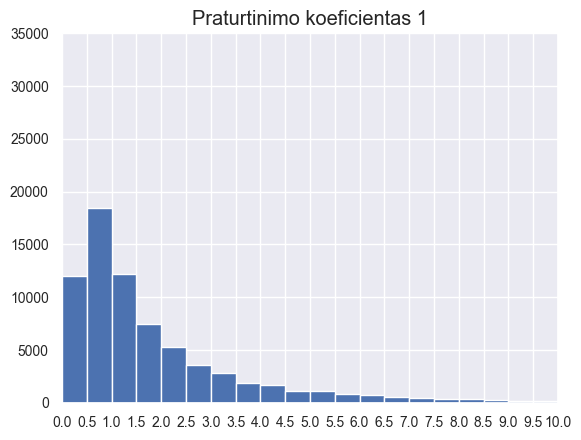

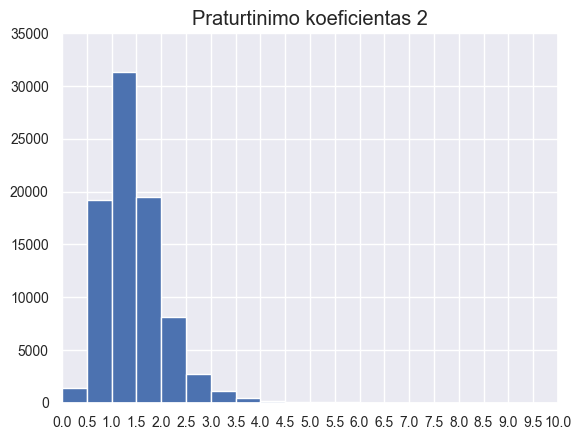

In [57]:
ratios = open["ratio"].copy()
ratios2 = open["ratio2"].copy()

new_max = open[open["ratio"] < np.inf]["ratio"].max() + 1
#new_min = open[open["ratio"] > -np.inf]["ratio"].min() - 1

#print(new_min)
print(new_max)

ratios.replace(np.inf, new_max, inplace=True)
#ratios.replace(-np.inf, new_min, inplace=True)
ratios.dropna()
print(ratios.describe())

bins = np.arange(0, 50, step=0.5)
plt.hist(ratios, bins=bins, range=(0, 50))
plt.title("Praturtinimo koeficientas 1")
plt.xticks(bins, fontsize = 10)
plt.yticks(fontsize = 10)
axes = plt.gca()
axes.set_ylim([0, 35000])
axes.set_xlim([0, 10])
plt.show()

bins = np.arange(0, 50, step=0.5)
plt.hist(ratios2, bins=bins, range=(0, 50))
plt.title("Praturtinimo koeficientas 2")
plt.xticks(bins, fontsize = 10)
plt.yticks(fontsize = 10)
axes = plt.gca()
axes.set_ylim([0, 35000])
axes.set_xlim([0, 10])
plt.show()

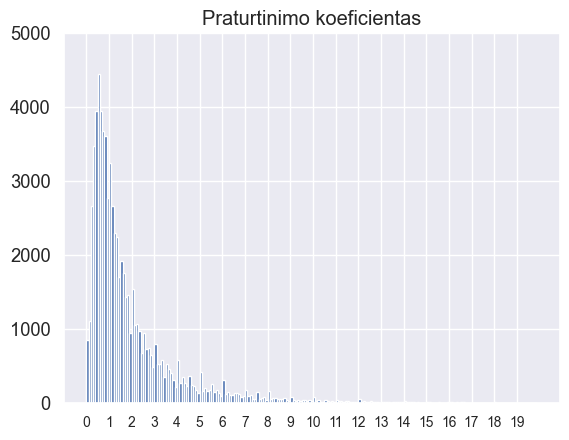

In [58]:
bins = np.arange(0, 20, step=0.1)
xbins = np.arange(0, 20, step=1)
plt.hist(ratios, bins=bins, range=(0, 20))
plt.title("Praturtinimo koeficientas")
plt.xticks(xbins, fontsize = 10)
axes = plt.gca()
axes.set_ylim([0,5000])
plt.show()

In [59]:
print(open.tail())
print(open_regions.tail())

                   open_bin         start           end  TT_S0  TT_S1  TT_S2  count  TT_S0_norm  surround_signal     ratio    ratio2
84232  [90597707, 90597803)  5.435864e+08  5.435864e+08   10.0    0.0    0.0    6.0    1.666667         2.000000  0.833333  2.047619
84233  [90598847, 90598959)  6.341921e+08  6.341921e+08    8.0    5.0   17.0    7.0    1.142857         0.333333  3.428571  1.404082
84234  [90599512, 90599601)  2.717986e+08  2.717986e+08    5.0    0.0    0.0    3.0    1.666667         3.000000  0.555556  2.047619
84235  [90599734, 90599866)  1.087197e+09  1.087197e+09    9.0    2.0    1.0   12.0    0.750000         0.500000  1.500000  0.921429
84236  [90600877, 90600955)  6.342063e+08  6.342063e+08    6.0    7.0    3.0    7.0    0.857143         0.500000  1.714286  1.053061
       seqnames     start       end        CG_ID  TT_S0  TT_S1  TT_S2  predict_state_SUM  Majority  diffs  lenght  open
192139       18  90597707  90597803  18_90597707    8.0    0.0    0.0             

In [60]:
open_regions_plus = open_regions.reset_index()
open_regions_plus = open_regions_plus.assign(Ratio = ratios)
open_regions_plus = open_regions_plus.assign(Ratio2 = ratios2)

In [61]:
open_regions_plus[open_regions_plus['Ratio'] > 57].count()

index                11066
seqnames             11066
start                11066
end                  11066
CG_ID                11066
TT_S0                11066
TT_S1                11066
TT_S2                11066
predict_state_SUM    11066
Majority             11066
diffs                11066
lenght               11066
open                 11066
Ratio                11066
Ratio2               11066
dtype: int64

In [62]:
a = open_regions_plus[open_regions_plus['Ratio2'] > 1]['index'].count()/84237
b = open_regions_plus[open_regions_plus['Ratio2'] > 2]['index'].count()/84237
c = open_regions_plus[open_regions_plus['Ratio2'] > 3]['index'].count()/84237

print(f"{a}, {b}, {c}")
print(open_regions_plus[open_regions_plus['Ratio2'] > 2.5]['index'].count())

0.7560335719458195, 0.15305625793891045, 0.024514168358322354
4785


In [63]:
open_filtered = open_regions_plus[open_regions_plus['Ratio2'] > 2.5]
open_filtered.head()

,index,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM,Majority,diffs,lenght,open,Ratio,Ratio2
3,7,18,3005107,3005389,18_3005107,1.0,2.0,0.0,20,1,1.0,283.0,True,0.153199,3.387879
4,9,18,3005448,3006448,18_3005448,0.0,1.0,0.0,13,1,1.0,1001.0,True,57.333333,11.529670
155,345,18,3264842,3264961,18_3264842,0.0,0.0,0.0,11,1,1.0,120.0,True,0.418750,3.292571
156,347,18,3265041,3265128,18_3265041,1.0,0.0,5.0,12,1,1.0,88.0,True,0.750185,2.845113
157,349,18,3265291,3265416,18_3265291,0.0,3.0,1.0,17,1,1.0,126.0,True,0.784355,2.959740


In [64]:
open_filtered_formatted = format_regions(open_filtered)
open_filtered_for_bed = open_filtered_formatted.drop(['index', 'TT_S0', 'TT_S1', 'TT_S2', 'width', 'Ratio', 'Ratio2'], axis = 1)
open_filtered_for_bed.head()

,Chromosome,Start,End,name,Score,strand
3,18,3005107,3005389,18_3005107,20,.
4,18,3005448,3006448,18_3005448,13,.
155,18,3264842,3264961,18_3264842,11,.
156,18,3265041,3265128,18_3265041,12,.
157,18,3265291,3265416,18_3265291,17,.


In [65]:
open_filtered_for_bed.to_csv("open.bed", sep='\t', index=False, header=False)

In [66]:
print_overlaps(open_filtered_formatted, dnaseq_formatted)

+-----------+--------------+-----------+-----------+-------------+-------+
| index     | Chromosome   | Start     | End       | name        | +8    |
| (int64)   | (category)   | (int64)   | (int64)   | (object)    | ...   |
|-----------+--------------+-----------+-----------+-------------+-------|
| 7         | 18           | 3005107   | 3005389   | 18_3005107  | ...   |
| 9         | 18           | 3005448   | 3006448   | 18_3005448  | ...   |
| 877       | 18           | 3490784   | 3490981   | 18_3490784  | ...   |
| 2233      | 18           | 4097736   | 4098314   | 18_4097736  | ...   |
| ...       | ...          | ...       | ...       | ...         | ...   |
| 189909    | 18           | 88971564  | 88971840  | 18_88971564 | ...   |
| 189911    | 18           | 88971908  | 88972472  | 18_88971908 | ...   |
| 190105    | 18           | 89089190  | 89089401  | 18_89089190 | ...   |
| 192099    | 18           | 90579385  | 90580098  | 18_90579385 | ...   |
+-----------+------------

In [67]:
print("Medianos")
print(open_filtered["lenght"].median())

print("\nModa")
print(open_filtered["lenght"].mode())

print("\nVidurkiai")
print(open_filtered["lenght"].mean())

print("\nSumos")
sum_filtered = open_filtered["lenght"].sum()
print(s1)

total_length = df['start']

print("\nFrakcija")
print(sum_filtered/CHROMOSOME_18_BP)

Medianos
167.0

Moda
0    92.0
dtype: float64

Vidurkiai
347.34420062695926

Sumos
33565122.0

Frakcija
0.018320414699334042


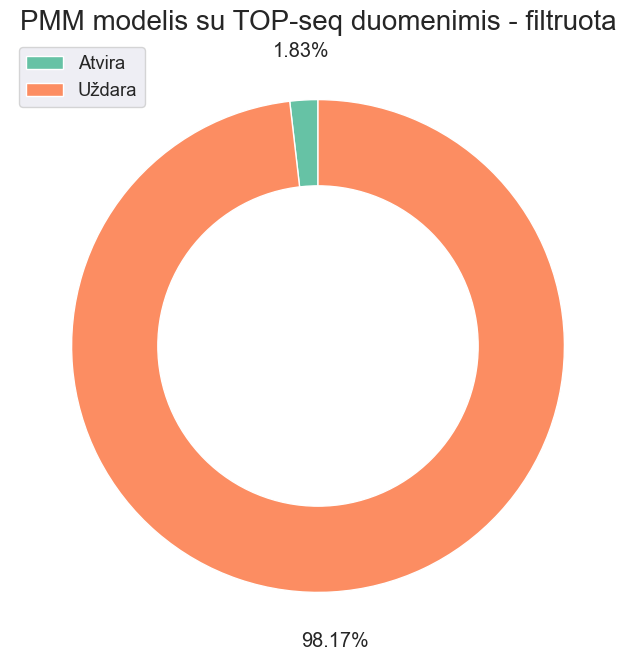

In [68]:
draw_circle_graph(sum_filtered, CHROMOSOME_18_BP-sum_filtered, "PMM modelis su TOP-seq duomenimis - filtruota")

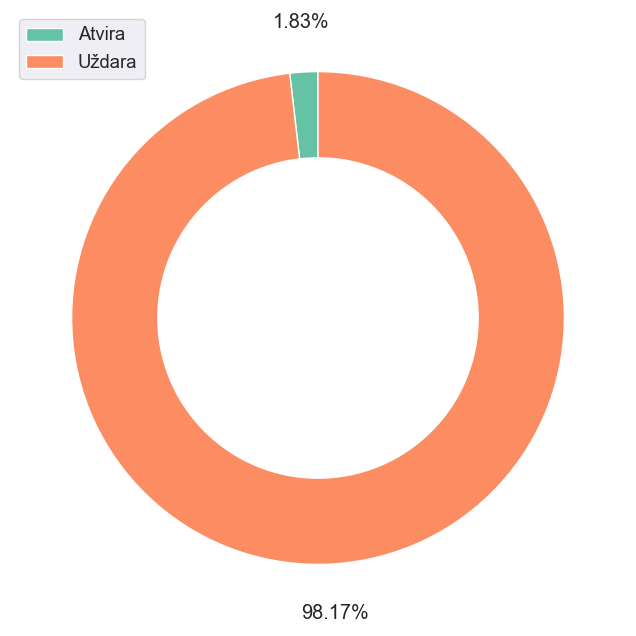

In [69]:
draw_circle_graph_notitle(sum_filtered, CHROMOSOME_18_BP-sum_filtered)

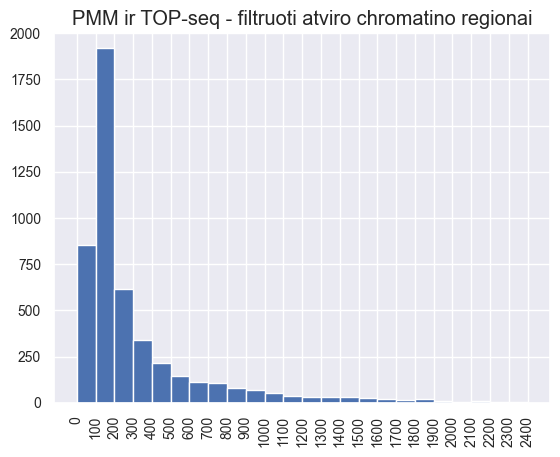

In [80]:
bins = np.arange(0, 2500, step=100)

plt.hist(open_filtered["lenght"], bins=bins, range=(-50, 2000))
plt.title("PMM ir TOP-seq - filtruoti atviro chromatino regionai")
plt.xticks(bins, fontsize = 10, rotation='vertical')
plt.yticks(fontsize = 10)

axes = plt.gca()
axes.set_ylim([0,2000])
plt.show()

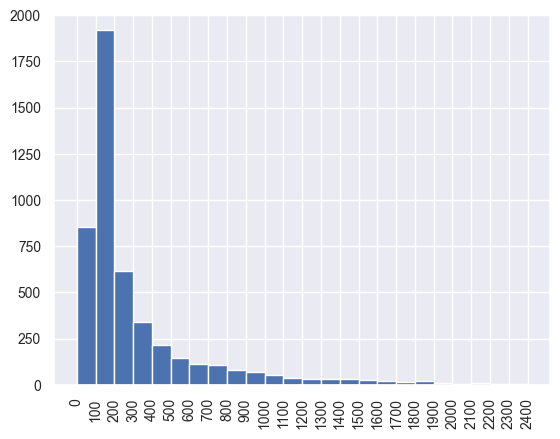

In [75]:
import numpy as np

bins = np.arange(0, 2500, step=100)

plt.hist(open_filtered["lenght"], bins=bins, range=(-50, 2000))
plt.xticks(bins, fontsize = 10, rotation='vertical')
plt.yticks(fontsize = 10)

axes = plt.gca()
axes.set_ylim([0,2000])
plt.show()

In [72]:
print("MODE:", open_filtered["lenght"].mode())
print("SUM:", open_filtered["lenght"].sum())

open_filtered["lenght"].describe()

MODE: 0    92.0
dtype: float64
SUM: 1662042.0


count     4785.000000
mean       347.344201
std        850.931953
min         76.000000
25%        110.000000
50%        167.000000
75%        353.000000
max      50072.000000
Name: lenght, dtype: float64